<a href="https://colab.research.google.com/github/nayonsoso/hg-mldl/blob/main/Ch02_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02-2 데이터 전처리

## numpy를 이용해 데이터셋 준비

배열 연산을 쉽게 해주는 numpy를 이용해 02-1 보다 더 효율적인 방법으로 데이터를 준비해보자.

**column_stack**은 전달된 배열을 **열로 연결하여 행렬을 리턴**하는 함수이다.

ex. column_stack([1,2,3],[a,b,c]) = [[1,a],[2,b],[3,c]]

**concatenate**은 **두 배열을 연결**하는 함수이다.

ex. column_stack([1,2,3],[a,b,c]) = [[1,2,3],[a,b,c]]

02-1처럼 수동으로 파이썬 리스트를 만들수도 있지만, 본 예제는 데이터 크기가 작아서 실행 속도에 차이가 없으나

데이터의 크기가 클 수록 시간이 오래 걸리므로 데이터 처리에 최적화되어있는 numpy를 이용하는 것이 좋다.


In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
               31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
               34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
               38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2,
               11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
               450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
               700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0,
               925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0,
               9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

import numpy as np
# column_stack
fish_data = np.column_stack((fish_length, fish_weight))
# concatenate
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

# 02-1 방식
# fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
# fish_target = [1]*35 + [0]*14

In [ ]:
# 데이터 확인
print(fish_data[:3], '\n', fish_target[:3])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]] 
 [1. 1. 1.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

사이킷런에서 제공하는 **train_test_split** 함수를 이용하면 랜덤하게 섞인 훈련세트와 테스트세트를 구할 수 있다.

-> 자동으로 랜덤하게 섞어주므로 2-1에서 사용했던 배열 인덱싱 안해도 됨

기본적으로 25%를 테스트 데이터로 떼어낸다. 

ex. 본 예제에서 데이터셋은 총 49개이므로 36개의 훈련세트와 13개의 테스트세트가 만들어진다.


**random_state** 변수는 np.random.seed()와 같은 역할을 한다.

**stratify** 변수에 타깃 테이터(fish_target)를 전달하면 타깃데이터와 같은 비율로 데이터를 나눈다.

ex. 타깃 데이터에서 1과 0의 비율은 35:14(2.5:1)이므로 훈련 세트와 테스트 세트의 비율도 각각 27:12(2.5:1) 와 9:4(2.5:1)이다.

In [ ]:
# train_test_split
from sklearn.model_selection import train_test_split
# 원래 데이터의 비율에 맞게 분류 - stratify 변수 이용
train_input, test_input, train_target, test_target = train_test_split(
 fish_data, fish_target, stratify=fish_target, random_state=42)
# 기본적으로 25%를 테스트 세트로 떼어낸다.
print(train_input.shape,train_target.shape, test_input.shape, test_target.shape)

(36, 2) (36,) (13, 2) (13,)


## 수상한 도미 한 마리

k-최근접 이웃으로 분류했을 때 잘못 분류되는 데이터 발생

### k-nn 모델 생성, 데이터 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()          # knn 모델 생성
kn.fit(train_input, train_target)    # 모델 훈련
kn.score(test_input, test_target)    # 점수

1.0

In [ ]:
# (25, 150)은 도미이지만, 빙어로 예측하는 오류 발생
print(kn.predict([[25, 150]]))

[0.]


모든 테스트 세트는 100%의 확률로 잘 분류하지만, 새로운 데이터 (25,150)은 잘 못 분류하는 오류가 발생한다.

### 문제가 되는 데이터 확인

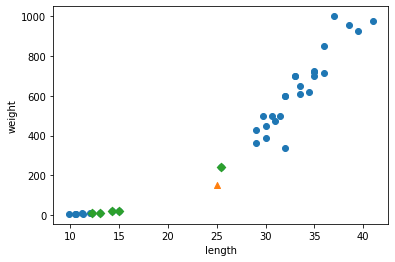

[[1. 0. 0. 0. 0.]]


In [ ]:
# matplotlib 으로 산점도 확인
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')

# kneighbors - 가장 가까운 5개 데이터까지의 거리, 데이터의 index 반환
distances, indexes = kn.kneighbors([[25, 150]])
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# indexes로 데이터 실체 확인 - 빙어와 가깝다고 나옴
print(train_target[indexes])

In [ ]:
# indexes로 데이터 실체 확인 - 빙어와 가깝다고 나옴
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [ ]:
# distances로 거리 확인
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


### 원인 파악


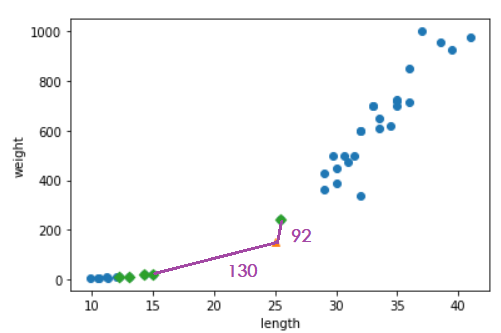

두 특성의 값이 놓인 범위(scale)가 다르다.

x축(길이)의 범위는 10-40 인 반면 y축(무게)의 범위는 0-1000 이다.

-> 거리를 측정하는데에 같은 기준이 적용되지 않는다는 문제 발생. 

ex. 10cm와 90mm를 비교할 때 기준을 고려하지 않은채 90mm가 더 크다고 하는 것과 같은 격

x축 범위를 0-1000으로 맞춘 후 matplotlib으로 확인하면 이를 확실히 알 수 있다.

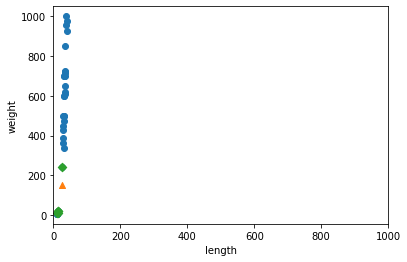

In [ ]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000)) # xlim = x축 범위 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 길이는 거리에 거의 영향을 주지 못하고 무게만 고려대상이 된다.

x축 범위를 y축과 동일하게 맞췄지만, 이는 단순히 범위 통일에 그칠 뿐이다.

실제로 x축의 분포와 y축의 분포는 고려하지 않으므로 '길이' 특성은 knn의 판단 기준인 거리에 영향을 주지 못하게 된다.

따라서 우리가 측정하는 scale 말고 분포를 고려하여 데이터를 수정 해야 한다! -> 데이터 전처리 필요

## 데이터 전처리

데이터를 표현하는 기준이 다르면 알고리즘이 제대로 예측할 수 없다. 

특히 거리를 기반으로 하는 k-nn에서는 특히 그렇다. 

따라서 특성값을 일정한 기준으로 맞춰주는 작업이 필요하다.

### z 점수로 데이터 전처리하기

z 점수(표준점수)는 x - mean / sigma 로 구할 수 있으며, 평균이 0, 표준편차가 1인 표준정규분포에서 

데이터가 0(평균)으로부터 표준편차의 몇배만큼 떨어져있는지를 나타낸다. 

cf. 통계학에서의 표준 정규 분포에서 사용되는 Z점수와 동일하다.

In [ ]:
# 열을 기준으로 평균과 표준편차 구하기 : axis=0은 열, axis=1은 행을 기준으로 함.
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)
print('길이, 무게 평균 :\t',mean,'\n길이, 무게 표준편차 :\t',std)

길이, 무게 평균 :	 [ 27.29722222 454.09722222] 
길이, 무게 표준편차 :	 [  9.98244253 323.29893931]


In [ ]:
# z 점수로 변환하기
train_scaled = (train_input - mean) / std

# 변환되었는지 확인
mean_ = np.mean(train_scaled, axis=0)
std_ = np.std(train_scaled, axis=0)
np.set_printoptions(precision=6, suppress=True) # 지수표현 대신 실수 출력
print(mean_, std_)

[ 0. -0.] [1. 1.]


### 예측 데이터도 z 점수로 변환하기

데이터셋 - '훈련세트'의 평균 / '훈련세트'의 표준편차로 z점수를 구했던 이전까지의 전처리와는 달리, 

예측할 데이터는 평균과 표준편차가 없으므로 **훈련세트의 평균과 표준편차를 이용**해야 한다.

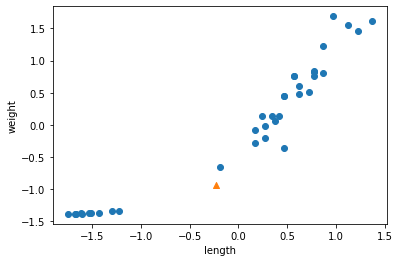

In [ ]:
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# x축과 y축의 범위가 동일해진 모습을 볼 수 있다.

## 전처리 데이터로 모델 훈련 & 예측하기

### k-nn 모델 훈련

In [ ]:
# 전처리 된 훈련세트 이용해서 모델 훈련
kn.fit(train_scaled, train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 테스트 세트도 z 점수로 변환

훈련 세트를 z 점수로 전처리했던것과 마찬가지로 테스트 세트도 z 점수로 변환해야 한다.

훈련 세트와 테스트 세트를 전처리하는 방식이 동일해야 하기 때문이다.


In [ ]:
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

### 데이터 예측 & 확인

In [ ]:
print(kn.predict([new]))

[1.]


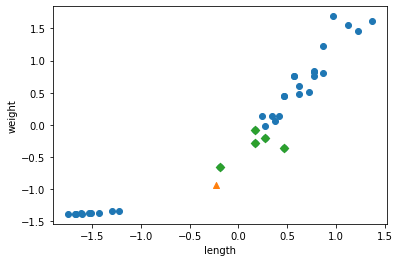

In [ ]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 이전과 달리 최근접이웃으로 도미가 나옴을 확인할 수 있다.